In [ ]:
import pandas as pd
import numpy as np

In [ ]:

players = pd.read_csv("players_22.csv")

In [ ]:

players.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [ ]:
features = ["overall", "potential", "wage_eur", "value_eur", "age"]

In [ ]:
players = players.dropna(subset=features)

In [ ]:

data = players[features].copy()

In [ ]:

data

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30
...,...,...,...,...,...
2845,73,78,12000.0,4600000.0,24
2846,73,73,22000.0,3000000.0,29
2847,73,73,950.0,3200000.0,27
2848,73,80,9000.0,6000000.0,22


In [ ]:

data = ((data - data.min()) / (data.max() - data.min())) * 10 + 1

In [ ]:
data.describe()

,overall,potential,wage_eur,value_eur,age
count,2832.000000,2832.000000,2832.000000,2832.000000,2832.000000
mean,2.814795,3.521186,2.047339,1.653734,4.948870
std,1.696414,1.960858,1.099716,0.842073,1.611049
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.500000,1.909091,1.414878,1.183320,3.800000
50%,2.500000,3.272727,1.729614,1.369223,5.000000
75%,3.500000,5.090909,2.251788,1.782339,6.200000
max,11.000000,11.000000,11.000000,11.000000,11.000000


In [ ]:

data.head()

,overall,potential,wage_eur,value_eur,age
0,11.0,10.090909,10.141631,5.009812,7.4
1,10.5,9.636364,8.711016,7.152853,6.6
2,10.0,9.181818,8.711016,3.305706,8.2
3,10.0,9.181818,8.711016,7.643429,5.4
4,10.0,9.181818,11.000000,7.462690,5.8


In [ ]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [ ]:
centroids = random_centroids(data, 5)

In [ ]:
centroids

,0,1,2,3,4
overall,1.000000,3.000000,1.500000,5.500000,2.500000
potential,1.454545,1.000000,2.818182,6.000000,1.909091
wage_eur,1.100143,1.672389,2.301860,1.786838,2.015737
value_eur,2.040537,1.126517,2.505293,1.291763,1.162665
age,5.400000,7.400000,7.000000,5.400000,5.800000


In [ ]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [ ]:
labels = get_labels(data, centroids)
labels.value_counts()

4    1141
3     869
0     593
1     227
2       2
dtype: int64

In [ ]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [ ]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

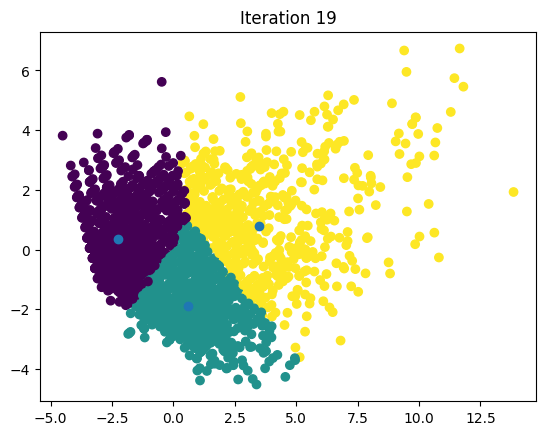

In [ ]:
max_iterations = 100
centroid_count = 3

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids

    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [20]:

centroids

,0,1,2
overall,1.742132,2.283531,5.327183
potential,1.809571,4.339534,5.709713
wage_eur,1.578303,1.763654,2.971915
value_eur,1.210750,1.566872,2.554775
age,5.771143,3.220488,4.657286


In [21]:

labels.value_counts()

0    1413
1     814
2     605
dtype: int64

In [23]:

players[labels == 0][["short_name"] + features]

,short_name,overall,potential,wage_eur,value_eur,age
388,G. Buffon,80,80,18000.0,2300000.0,43
509,Iniesta,79,79,10000.0,5500000.0,37
510,J. Milner,79,79,76000.0,7000000.0,35
511,F. Ribéry,79,79,41000.0,6000000.0,38
512,B. Costil,79,79,24000.0,5500000.0,33
...,...,...,...,...,...,...
2841,Raillo,73,73,20000.0,2500000.0,29
2843,I. Rivero,73,73,46000.0,3000000.0,29
2846,K. Onisiwo,73,73,22000.0,3000000.0,29
2847,T. Lorch,73,73,950.0,3200000.0,27


In [24]:

from sklearn.cluster import KMeans

In [25]:
kmeans = KMeans(3)
kmeans.fit(data)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [26]:

pd.DataFrame(kmeans.cluster_centers_, columns=features).T

,0,1,2
overall,1.960040,6.176000,2.827479
potential,2.022651,6.530909,4.660312
wage_eur,1.644148,3.928717,1.938698
value_eur,1.225629,3.215977,1.707046
age,5.866622,4.905067,3.554132
